# Playground

## Imports

In [53]:
import numpy as np
import os
import json
from src.utils.train_test_split import train_test_split
from src.utils.loss_functions import rmae
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Preparing the data

We split the data into train, validation and test set. 
Since we will perform binary classification, we select only 0 and 1 digits.

In [54]:
# Importing the data
with open('./data/mnist/train_images.npy', 'rb') as f:
    X_train = np.load(f)
with open('./data/mnist/train_labels.npy', 'rb') as f:
    y_train = np.load(f)
with open('./data/mnist/test_images.npy', 'rb') as f:
    X_test = np.load(f)
with open('./data/mnist/test_labels.npy', 'rb') as f:
    y_test = np.load(f)

# Permuting the datasets
idx_train = np.random.permutation(X_train.shape[0])
X_train = X_train[idx_train]
y_train = y_train[idx_train]
idx_test = np.random.permutation(X_test.shape[0])
X_test = X_test[idx_test]
y_test = y_test[idx_test]

# Split train set into train and validation set
X_train, y_train, X_val, y_val = train_test_split(X_train, y_train, validation_fraction=0.2)

# Selecting only 0s and 1s
idx_train = np.sort(np.concatenate((np.where(y_train==0)[0], np.where(y_train==1)[0])))
X_train = X_train[idx_train]
y_train = y_train[idx_train]
idx_val = np.sort(np.concatenate((np.where(y_val==0)[0], np.where(y_val==1)[0])))
X_val = X_val[idx_val]
y_val = y_val[idx_val]
idx_test = np.sort(np.concatenate((np.where(y_test==0)[0], np.where(y_test==1)[0])))
X_test = X_test[idx_test]
y_test = y_test[idx_test]

## Classical feature space dimensionality reduction

Here we want to perform a linear dimensionality reduction first in order to reduce the number of needed qubits.

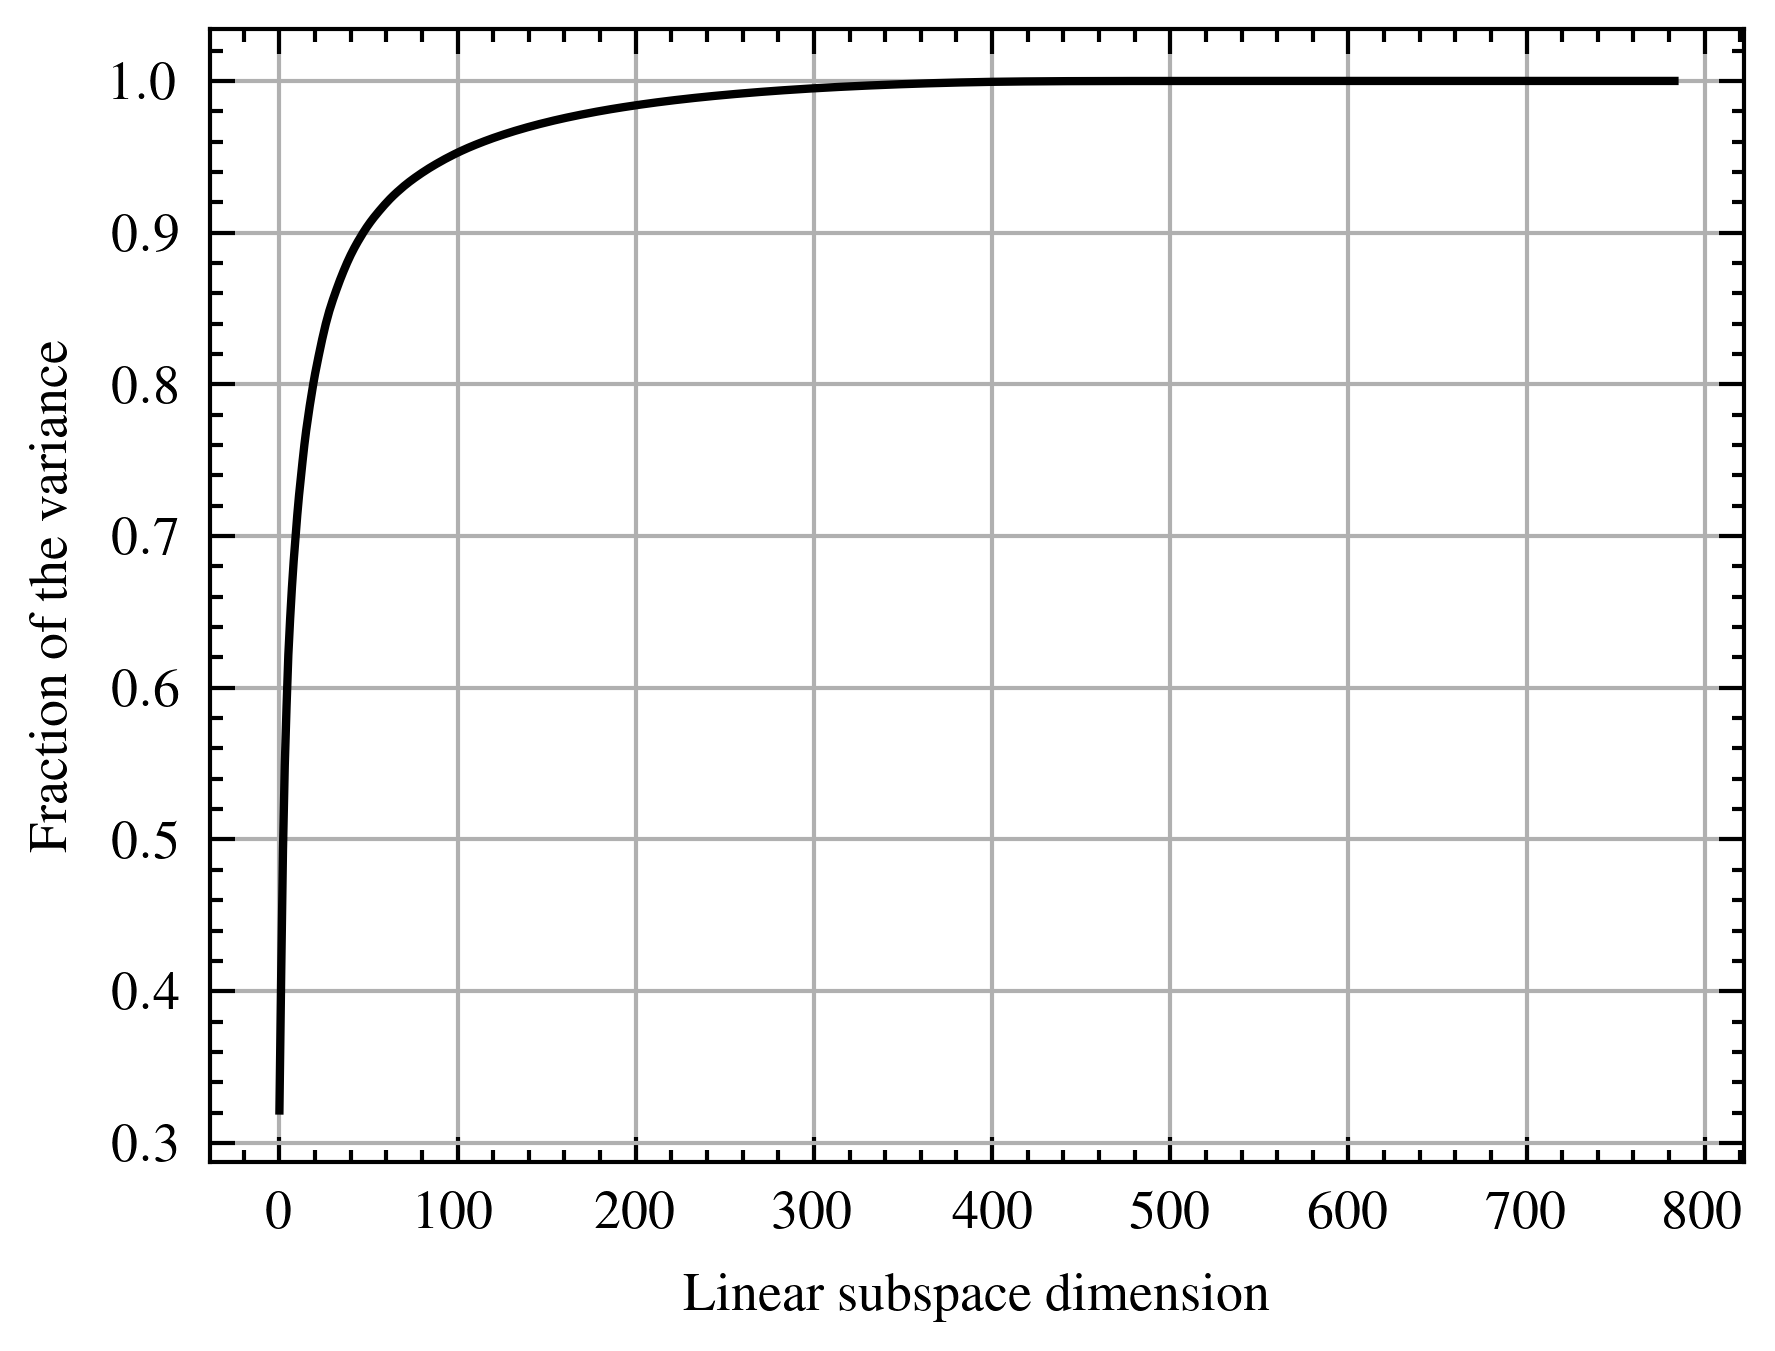

In [55]:
plt.style.use('./src/plots.mplstyle')
model = PCA(n_components=28*28, whiten=True, svd_solver='randomized').fit(X_train.reshape((-1, 28*28)))
fig, axes = plt.subplots(nrows=1, ncols=1)
axes.plot(np.cumsum(model.explained_variance_ratio_))
axes.set_xlabel('Linear subspace dimension')
axes.set_ylabel('Fraction of the variance')
axes.grid(True)
plt.savefig('./paper/assets/figures/pca_mnist.png', dpi=300, transparent=False, bbox_inches='tight')

In [56]:
np.cumsum(model.explained_variance_ratio_)[63]

0.9233385904926906

In [57]:
np.cumsum(model.explained_variance_ratio_)[127]

0.9651455532060675

So we see that with amplitude encoding and 6 qubits we capture 92% of the variance, and with 7 qubits 97% of the variance.
Let us work with 6 qubits.

In [58]:
model = PCA(n_components=64, whiten=True, svd_solver='randomized').fit(X_train.reshape((-1, 28*28)))
X_train = model.transform(X_train.reshape((-1, 28*28)))
X_val = model.transform(X_val.reshape((-1, 28*28)))
X_test = model.transform(X_test.reshape((-1, 28*28)))